In [33]:
import pandas as pd
import numpy as np
import config
import artifacts

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import pickle
import json
import seaborn as sns

### Data Gathering

In [2]:
df = pd.read_csv(config.CSV_FILE_PATH)
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### EDA

In [3]:
x = df.drop(["PRICE",'Unnamed: 0'],axis = 1) # 2D array or df
y=df['PRICE']

In [4]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### scaling before splitting

In [23]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(x)
dfx = pd.DataFrame(array, columns = x.columns)
dfx

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [6]:
# normal_scaler = StandardScaler()
# array = normal_scaler.fit_transform(x)
# dfx1 = pd.DataFrame(array, columns = x.columns)
# dfx1


### To check outliers

In [22]:
# sns.kdeplot(x = dfx['LSTAT'])

<AxesSubplot: >

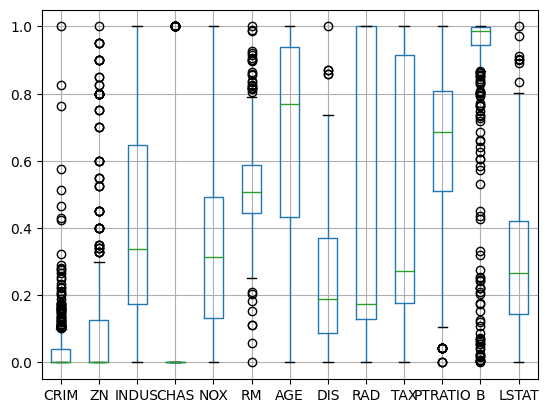

In [7]:
dfx.boxplot()#we boxplot whole df due its scaled data

In [99]:
# dfx['CRIM'].skew()

5.22314879824385

In [8]:
# from scipy.stats import yeojohnson
# array1=yeojohnson(dfx['CRIM'])
# sns.boxplot(array1[0])

In [9]:
# dfx['CRIM']=array1[0]
# sns.boxplot(dfx['CRIM'])

In [10]:
# array2=yeojohnson(dfx['ZN'])
# sns.boxplot(array2[0])
# dfx['ZN']=array2[0]
# sns.boxplot(dfx['ZN'])

In [11]:
sns.boxplot(dfx['RM'])

<AxesSubplot: >

In [13]:
# array3=yeojohnson(dfx['RM'])
# sns.boxplot(array3[0])
# # dfx['RM']=array3[0]
# # sns.boxplot(dfx['RM'])

In [14]:
# q1=np.quantile(dfx['RM'],0.25)#CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
# q3=np.quantile(dfx['RM'],0.75)
# iqr=q3-q1
# upper_tail=q3+1.5*iqr
# print('upper_tail',upper_tail)
# lower_tail=q1-1.5*iqr
# print('lower_tail',lower_tail)
# dfx.loc[(dfx['RM']>upper_tail),'RM']=upper_tail
# dfx.loc[(dfx['RM']<lower_tail),'RM']=lower_tail
# sns.boxplot(dfx['RM'])

In [15]:
# array4=yeojohnson(dfx['DIS'])
# sns.boxplot(array4[0])
# dfx['DIS']=array4[0]
# sns.boxplot(dfx['DIS'])

In [16]:
# array5=yeojohnson(dfx['PTRATIO'])
# sns.boxplot(array5[0])
# dfx['PTRATIO']=array5[0]
# sns.boxplot(dfx['PTRATIO'])

In [17]:
# sns.kdeplot(dfx['B'])

In [18]:
# array6=yeojohnson(dfx['B'])
# sns.boxplot(array5[0])
# dfx['B']=array5[0]
# sns.boxplot(dfx['B'])

In [19]:
# array6=yeojohnson(dfx['LSTAT'])
# sns.boxplot(array5[0])
# dfx['LSTAT']=array5[0]
# sns.boxplot(dfx['LSTAT'])

In [20]:
# dfx.boxplot()

In [21]:
# q1=np.quantile(dfx['CRIM'],0.25)#CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
# q3=np.quantile(dfx['CRIM'],0.75)
# iqr=q3-q1
# upper_tail=q3+1.5*iqr
# print('upper_tail',upper_tail)
# lower_tail=q1-1.5*iqr
# print('lower_tail',lower_tail)
# dfx.loc[dfx['CRIM']>upper_tail]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(dfx, y, test_size = 0.2,
                                                    shuffle=True, random_state=10,stratify=dfx['CHAS'])
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
336,0.000314,0.00,0.173387,0.0,0.267490,0.442230,0.446962,0.372969,0.173913,0.070611,0.808511,1.000000,0.222682
136,0.003555,0.00,0.785557,0.0,0.491770,0.456218,0.933059,0.076140,0.130435,0.477099,0.914894,0.952973,0.418598
374,0.207844,0.00,0.646628,0.0,0.582305,0.110558,1.000000,0.000673,1.000000,0.914122,0.808511,1.000000,1.000000
187,0.000814,0.45,0.109238,0.0,0.106996,0.617168,0.393409,0.241795,0.173913,0.402672,0.276596,0.992360,0.136589
285,0.000052,0.55,0.065616,0.0,0.008230,0.554129,0.298661,0.561767,0.000000,0.215649,0.287234,0.994503,0.179360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.001180,0.00,1.000000,0.0,0.460905,0.464074,0.830072,0.089143,0.130435,1.000000,0.797872,1.000000,0.320640
477,0.168788,0.00,0.646628,0.0,0.471193,0.333972,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
269,0.000948,0.20,0.238270,1.0,0.162551,0.452002,0.603502,0.253517,0.086957,0.068702,0.638298,0.985980,0.328918
193,0.000175,0.60,0.090543,0.0,0.032922,0.620617,0.072091,0.462858,0.000000,0.148855,0.319149,0.991099,0.091060


In [25]:
x_train.CHAS.value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

In [10]:
376/28

13.428571428571429

#### scaling after splitting

In [26]:
# normal_scaler = MinMaxScaler()
# array = normal_scaler.fit_transform(x_train)
# dfx_train = pd.DataFrame(array, columns = x.columns)
# dfx_train


In [27]:
# normal_scaler = MinMaxScaler()
# array = normal_scaler.fit_transform(x_test)
# dfx_test = pd.DataFrame(array, columns = x.columns)
# dfx_test


In [29]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [30]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [31]:
train_accuracy = knn_model.score(x_train,y_train)
print('train_accuracy',train_accuracy)
test_accuracy = knn_model.score(x_test,y_test)
print('test_accuracy',test_accuracy)

train_accuracy 0.8248825205217071
test_accuracy 0.7111760491916939


#### Hyperparameter Tuning

In [34]:
knn_model = KNeighborsRegressor()
param_grid = {"n_neighbors" : np.arange(3,20),'p':[1,2]}
gscv_model = GridSearchCV(knn_model, param_grid, cv = 5)
gscv_model.fit(x_train, y_train)
gscv_model.best_estimator_

KNeighborsRegressor(n_neighbors=3, p=1)

In [35]:
model=gscv_model.best_estimator_
train_accuracy = model.score(x_train,y_train)
print('train_accuracy',train_accuracy)
test_accuracy = model.score(x_test,y_test)
print('test_accuracy',test_accuracy)

train_accuracy 0.9008719049971801
test_accuracy 0.8462451089297869


In [36]:
# lasso_reg_model = Lasso(alpha=1) # estimators

# param_grid = {"alpha" : np.arange(0.05, 2, 0.001)}

# gscv_lasso_model = GridSearchCV(lasso_reg_model, param_grid, cv = 5)
# gscv_lasso_model.fit(x_train, y_train)
# gscv_lasso_model.best_estimator_

In [37]:
# ridge_reg = Ridge(alpha=1.0)

# hyp = {'alpha' : np.arange(0.05, 2, 0.001) }

# rscv_ridge_reg = RandomizedSearchCV(ridge_reg, hyp, cv = 5, random_state = 23) # 3 to 10
# rscv_ridge_reg.fit(x_train, y_train)
# rscv_ridge_reg.best_estimator_

In [40]:
# ridge_model = rscv_ridge_reg.best_estimator_

# ridge_model.fit(x_train, y_train)

Ridge(alpha=0.2870000000000002)

In [43]:
# train_accuracy = ridge_model.score(x_train,y_train)
# print('train_accuracy',train_accuracy)
# test_accuracy = ridge_model.score(x_test,y_test)
# print('test_accuracy',test_accuracy)

train_accuracy 0.749606821040435
test_accuracy 0.6705492726267352


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
#on test

y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test , y_pred)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

mae = mean_absolute_error(y_test , y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test , y_pred)
print("R-Squared Value is :",r_squared)

n = x_test.shape[0]
k = x_test.shape[1]

adj_r2 = 1 - (((1- r_squared) * (n - 1))/(n - k - 1))
print("Adjusted R-squared value :",adj_r2)

MSE : 10.72011982570806
RMSE : 3.274159407498062
MAE : 2.306862745098039
R-Squared Value is : 0.8462451089297869
Adjusted R-squared value : 0.8235313182035053


#### save the model

In [40]:
with open(r'artifacts/regression_model.pkl','wb') as f:
    pickle.dump(model, f)

In [41]:
model.n_features_in_

13

#### save scaling model

In [43]:
with open(r'artifacts/normal_scaler_model.pkl','wb') as f:
    pickle.dump(normal_scaler, f)

In [ ]:
with open(r'artifacts/normal_scaler_model.pkl','wb') as f:
    pickle.dump(normal_scaler, f)

In [42]:
x.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
0.00632	18.0	2.31	0.0	0.538	6.575	65.2	4.0900	1.0	296.0	15.3	396.90	4.98	24.0

In [47]:
CRIM =0.00632
ZN = 18.0
INDUS = 2.31
CHAS = 0.0
NOX = 0.538
RM = 6.575
AGE=65.2
DIS=4.0900
RAD=1.0
TAX=296
PTRATIO=15.3
B=396
LSTAT=4.98

In [50]:
test_array = np.array([CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT],ndmin=2)
test_array

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.960e+02,
        4.980e+00]])

In [52]:
df1=pd.DataFrame(test_array,columns=model.feature_names_in_)
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.0,4.98


In [55]:
scaler_array = normal_scaler.transform(x)
scaler_df = pd.DataFrame(scaler_array)
scaler_df

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.